### Sweep + Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.quantum_info import (
    DensityMatrix,
    concurrence,
    negativity,
    Statevector
)
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error


In [2]:
from qiskit import QuantumCircuit

def create_bell_circuit():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc


In [3]:
bell = create_bell_circuit()

ideal_state = Statevector.from_instruction(bell)
ideal_dm = DensityMatrix(ideal_state)


In [4]:
def depolarizing_noise_model(p):
    noise_model = NoiseModel()
    
    error_1q = depolarizing_error(p, 1)
    error_2q = depolarizing_error(p, 2)
    
    noise_model.add_all_qubit_quantum_error(error_1q, ['h'])
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
    
    return noise_model


In [5]:
def simulate_noisy_density_matrix(noise_model):
    sim = AerSimulator(
        noise_model=noise_model,
        method="density_matrix"
    )
    
    qc = create_bell_circuit()
    qc.save_density_matrix()
    
    result = sim.run(qc).result()
    rho = result.data(0)['density_matrix']
    
    return DensityMatrix(rho)


In [6]:
noise_levels = np.linspace(0, 0.3, 10)

concurrence_values = []
negativity_values = []

for p in noise_levels:
    noisy_dm = simulate_noisy_density_matrix(
        depolarizing_noise_model(p)
    )
    
    concurrence_values.append(concurrence(noisy_dm))
    negativity_values.append(negativity(noisy_dm, qargs=[0]))


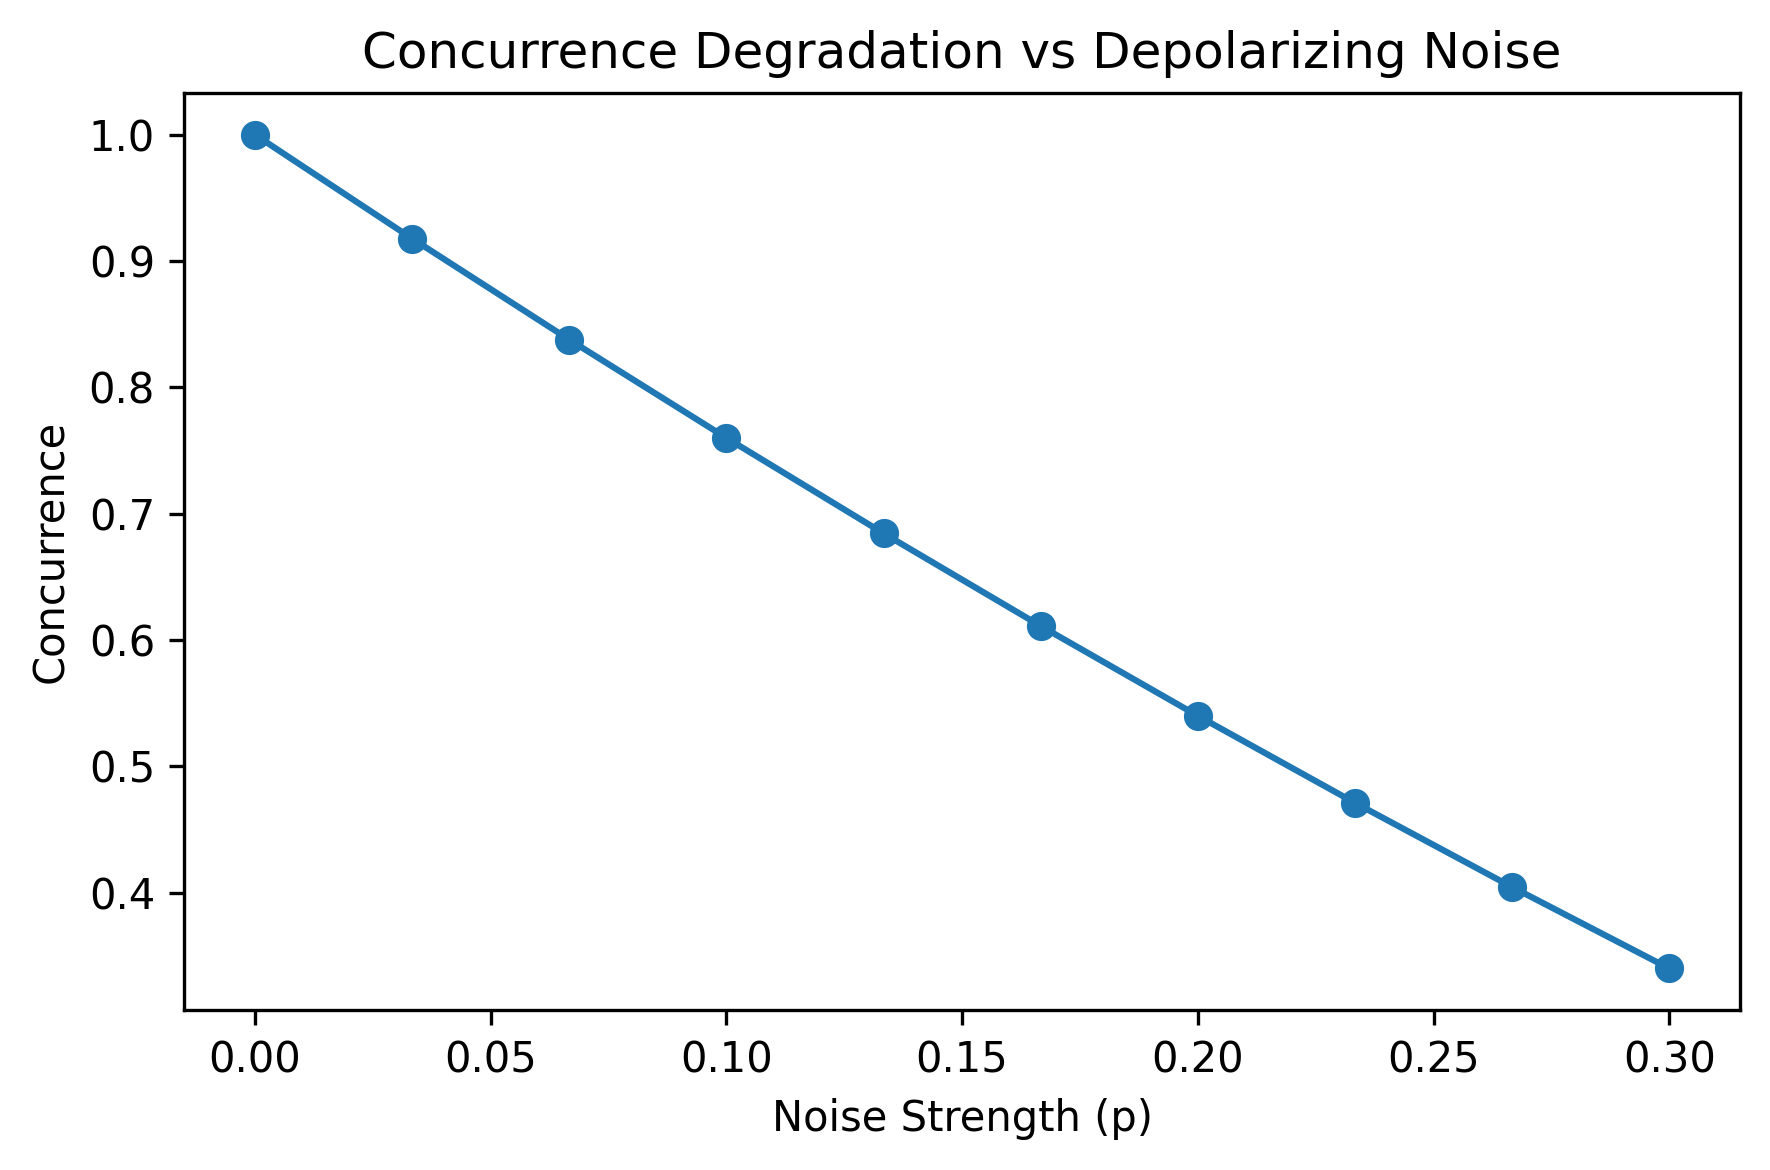

In [7]:
plt.figure(figsize=(6,4), dpi=300)
plt.plot(noise_levels, concurrence_values, marker='o')

plt.xlabel("Noise Strength (p)")
plt.ylabel("Concurrence")
plt.title("Concurrence Degradation vs Depolarizing Noise")

plt.tight_layout()
plt.savefig("../results/concurrence_vs_noise.png")
plt.show()


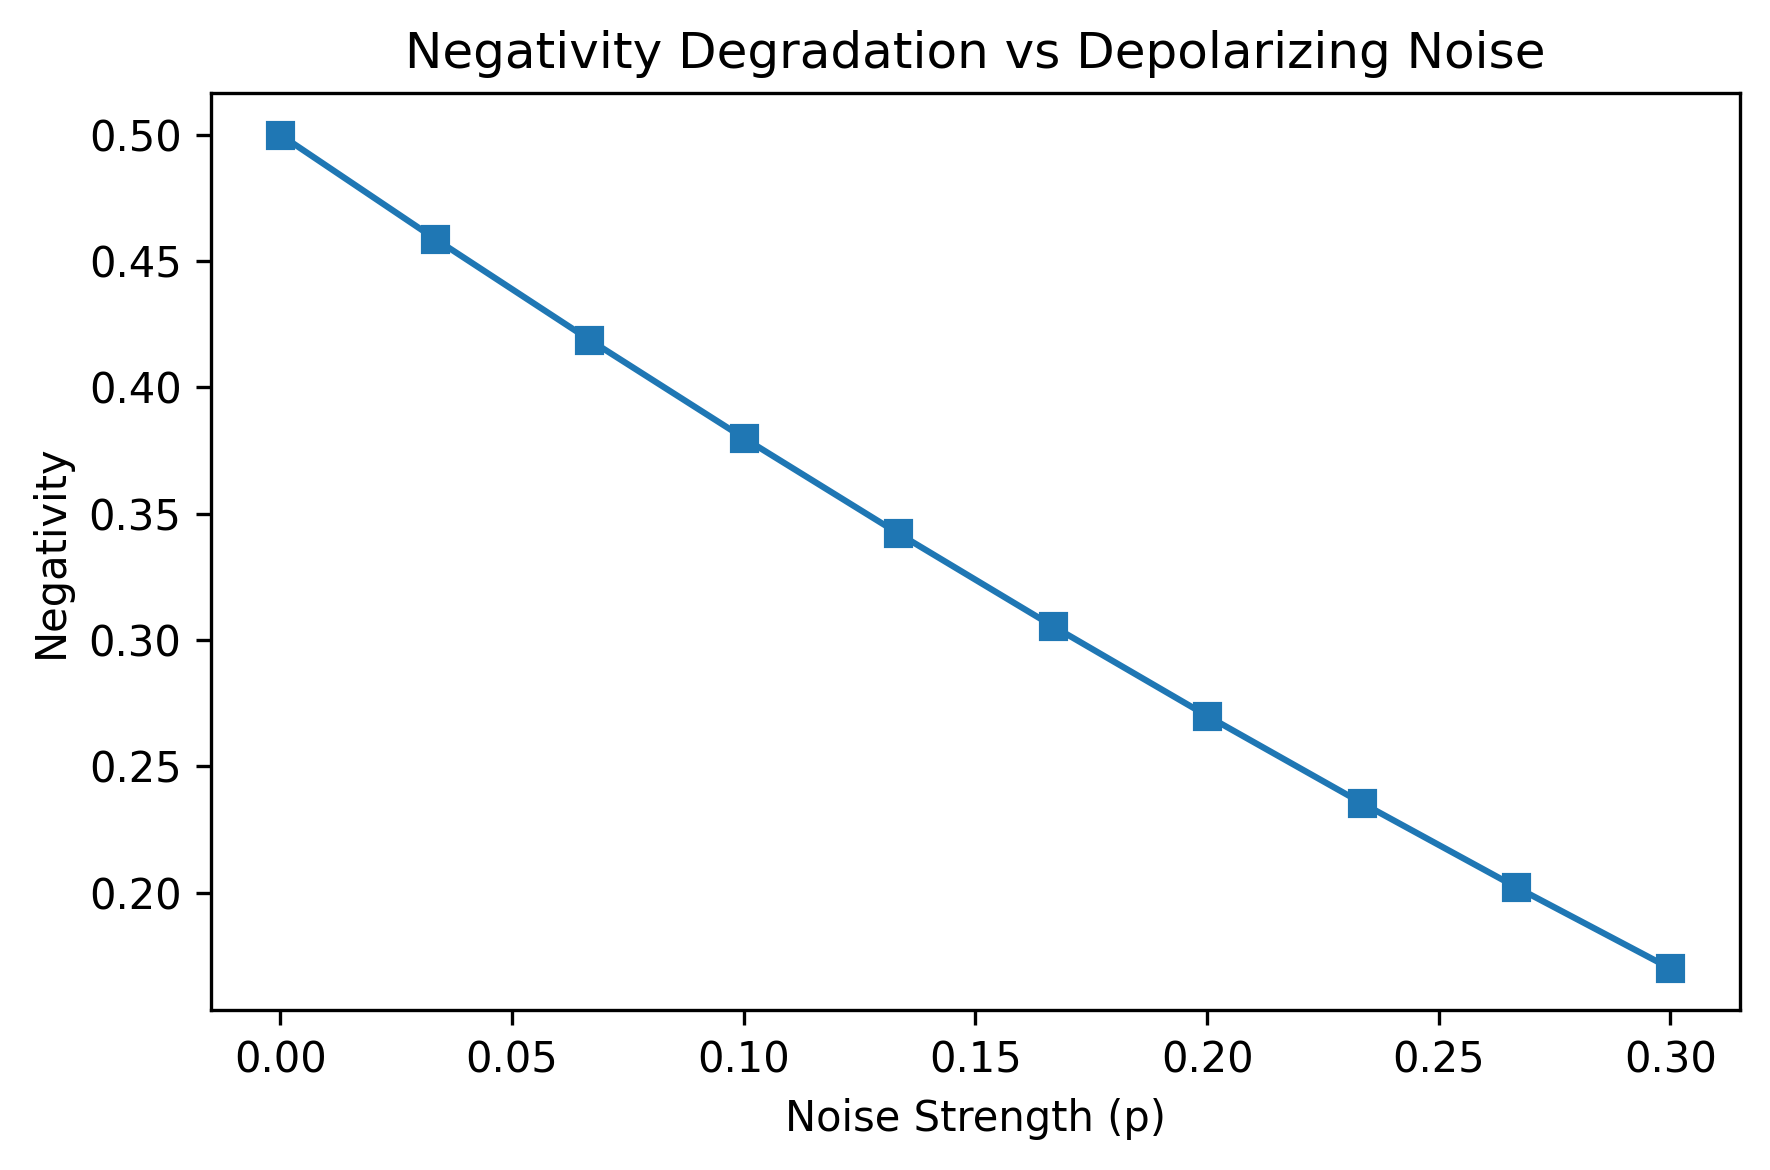

In [8]:
plt.figure(figsize=(6,4), dpi=300)
plt.plot(noise_levels, negativity_values, marker='s')

plt.xlabel("Noise Strength (p)")
plt.ylabel("Negativity")
plt.title("Negativity Degradation vs Depolarizing Noise")

plt.tight_layout()
plt.savefig("../results/negativity_vs_noise.png")
plt.show()
